In [34]:
import matplotlib as mpl
plt.rc('text', usetex=True)

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cmr10'  # Computer Modern Roman
mpl.rcParams['font.size'] = 12  # Adjust the font size as needed

In [45]:
type(spec), type(spec[0][0]), type(spec[0][1]), type(spec[0])

(list,
 astropy.io.fits.hdu.image.PrimaryHDU,
 astropy.io.fits.hdu.table.BinTableHDU,
 astropy.io.fits.hdu.hdulist.HDUList)

/var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/ipykernel_13750/449759179.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(spec[0][1].data['loglam'], spec[0][1].data['flux'], color='gray')


Text(0, 0.5, '$F_\\lambda \\ [10^{-17} \\ \\rm{erg} \\ \\rm{cm}^{-2} \\ \\rm{s}^{-1} \\ \\rm{\\AA}^{-1}]$')

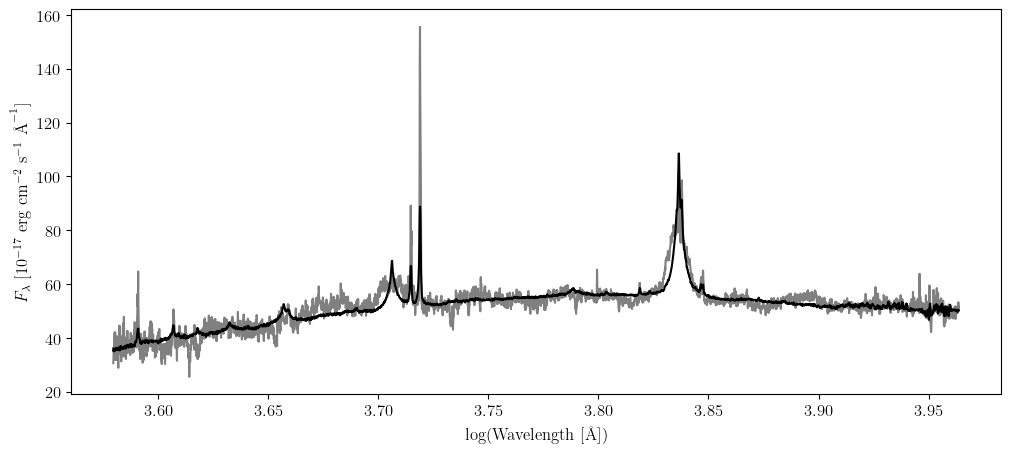

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(spec[0][1].data['loglam'], spec[0][1].data['flux'], color='gray')
plt.plot(spec[0][1].data['loglam'], spec[0][1].data['model'], color='k')
plt.xlabel(r'log(Wavelength [$\rm{\AA}$])')
plt.ylabel(r'$F_\lambda \ [10^{-17} \ \rm{erg} \ \rm{cm}^{-2} \ \rm{s}^{-1} \ \rm{\AA}^{-1}]$')

In [19]:
spec[0][3].data

FITS_rec([(751, 52251, 160, 'Ly_alpha', 1215.67      , 0.        , -1.0000000e+00,    0.    , -1.     ,  0.0000000e+00, -1.0000000e+00,  0.0000000e+00, -1.0000000e+00,  0.      , -1.        ,   0,   0,   0.     , -1.0000000e+00),
          (751, 52251, 160, 'N_V 1240', 1240.81      , 0.        , -1.0000000e+00,    0.    , -1.     ,  0.0000000e+00, -1.0000000e+00,  0.0000000e+00, -1.0000000e+00,  0.      , -1.        ,   0,   0,   0.     , -1.0000000e+00),
          (751, 52251, 160, 'C_IV 1549', 1549.48      , 0.        , -1.0000000e+00,    0.    , -1.     ,  0.0000000e+00, -1.0000000e+00,  0.0000000e+00, -1.0000000e+00,  0.      , -1.        ,   0,   0,   0.     , -1.0000000e+00),
          (751, 52251, 160, 'He_II 1640', 1640.42      , 0.        , -1.0000000e+00,    0.    , -1.     ,  0.0000000e+00, -1.0000000e+00,  0.0000000e+00, -1.0000000e+00,  0.      , -1.        ,   0,   0,   0.     , -1.0000000e+00),
          (751, 52251, 160, 'C_III] 1908', 1908.734     , 0.        , -1.0000

In [12]:
import matplotlib.pyplot as plt

plt.plot(spec[0][3].data['loglam'], spec[0][3].data['flux'])
# plt.plot(spec[0][5].data['loglam'], spec[0][5].data['flux'])
# plt.plot(spec[0][6].data['loglam'], spec[0][6].data['flux'])
# plt.plot(spec[0][7].data['loglam'], spec[0][7].data['flux'])
# plt.plot(spec[0][8].data['loglam'], spec[0][8].data['flux'])
# plt.plot(spec[0][9].data['loglam'], spec[0][9].data['flux'])
# plt.plot(spec[0][1].data['loglam'], spec[0][1].data['flux'], color='gray', alpha=0.5)
# plt.plot(spec[0][1].data['loglam'], spec[0][1].data['model'])

KeyError: "Key 'loglam' does not exist."

In [109]:
spec[0][10].data

IndexError: list index out of range

In [17]:
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord

pos = SkyCoord(2.02344483, 14.83982059, unit='deg')
result = SDSS.query_crossid(pos)#, photoobj_fields=['modelMag_g', 'modelMag_i'])
result

name,objID,ra,dec,psfMag_u,psfMagerr_u,psfMag_g,psfMagerr_g,psfMag_r,psfMagerr_r,psfMag_i,psfMagerr_i,psfMag_z,psfMagerr_z,type
str5,uint64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6
obj_0,1237652943176138868,2.02344596573482,14.8398237551311,18.88552,0.02221064,17.90644,0.02398672,17.45433,0.01123169,17.06867,0.01081798,16.67876,0.01843148,GALAXY


In [13]:
['objID', 'ra', 'dec'] + [zip(
                    [f'psfMag_{band}' for band in ['u', 'g', 'r', 'i', 'z']],
                    [f'psfMagerr_{band}' for band in ['u', 'g', 'r', 'i', 'z']],
                    [f'modelMag_{band}' for band in ['u', 'g', 'r', 'i', 'z']],
                    [f'modelMagerr_{band}' for band in ['u', 'g', 'r', 'i', 'z']],
                )]

['objID',
 'ra',
 'dec',
 ('psfMag_u', 'psfMagerr_u', 'modelMag_u', 'modelMagerr_u'),
 ('psfMag_g', 'psfMagerr_g', 'modelMag_g', 'modelMagerr_g'),
 ('psfMag_r', 'psfMagerr_r', 'modelMag_r', 'modelMagerr_r'),
 ('psfMag_i', 'psfMagerr_i', 'modelMag_i', 'modelMagerr_i'),
 ('psfMag_z', 'psfMagerr_z', 'modelMag_z', 'modelMagerr_z')]

In [16]:
sdss_bands = ['u', 'g', 'r', 'i', 'z']
flattened_list = ['objID', 'ra', 'dec'] + [item for sublist in zip(
    [f'psfMag_{band}' for band in sdss_bands],
    [f'psfMagerr_{band}' for band in sdss_bands],
    [f'modelMag_{band}' for band in sdss_bands],
    [f'modelMagerr_{band}' for band in sdss_bands],
) for item in sublist]

flattened_list

['objID',
 'ra',
 'dec',
 'psfMag_u',
 'psfMagerr_u',
 'modelMag_u',
 'modelMagerr_u',
 'psfMag_g',
 'psfMagerr_g',
 'modelMag_g',
 'modelMagerr_g',
 'psfMag_r',
 'psfMagerr_r',
 'modelMag_r',
 'modelMagerr_r',
 'psfMag_i',
 'psfMagerr_i',
 'modelMag_i',
 'modelMagerr_i',
 'psfMag_z',
 'psfMagerr_z',
 'modelMag_z',
 'modelMagerr_z']

In [30]:
from Source_Analysis.Sources import Source
src = Source(9.56139752622691	-24.9839560757131)
src.data

Loading catalogs!
Searching for source in the catalogs!
Searching for source in the catalogs!
Searching for source in the catalogs!
Falling back on ZTF image metadata with coordinate query...
Falling back on ZTF image metadata with coordinate query...
Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=ra>9.11695555+AND+ra<10.005844450000001+AND+dec>-25.42840445+AND+dec<-24.53951555Falling back on ZTF image metadata with coordinate query...

Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=ra>9.11695555+AND+ra<10.005844450000001+AND+dec>-25.42840445+AND+dec<-24.53951555
Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=ra>9.11695555+AND+ra<10.005844450000001+AND+dec>-25.42840445+AND+dec<-24.53951555


KeyError: 'i'

In [5]:
import numpy as np

lc.lc[np.abs(lc.lc['mjd'][10] - lc.lc['mjd']) < 1]

AttributeError: 'Table' object has no attribute 'lc'

In [6]:
import sys
sys.path.append('/Users/adamboesky/Research/long_transients')
from Source_Analysis.Light_Curve import Light_Curve

lc = Light_Curve(9.56139752622691, -24.9839560757131, catalogs=['panstarrs'])
lc.lc

Querying panstarrs catalog for light curve...


panstarrs_id,ra,dec,mjd,pstarr_infoFlag2,pstarr_g_mag,pstarr_g_magerr,pstarr_r_mag,pstarr_r_magerr,pstarr_i_mag,pstarr_i_magerr,pstarr_z_mag,pstarr_z_magerr,pstarr_y_mag,pstarr_y_magerr
int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
78010095613919548,9.56140142,-24.98393237,55478.386113,128,19.137504628852,0.010799454194474136,--,--,--,--,--,--,--,--
78010095613919548,9.56138761,-24.98394953,55447.48401015,128,19.622045569458574,0.018551551067531594,--,--,--,--,--,--,--,--
78010095613919548,9.5614046,-24.98394949,55837.45521605,128,19.737907268715706,0.024992938021166256,--,--,--,--,--,--,--,--
78010095613919548,9.56139446,-24.98391515,56600.341214700005,0,20.564227327332436,0.050206394654542505,--,--,--,--,--,--,--,--
78010095613919548,9.56140703,-24.98395168,56625.26246485,128,20.33562632529423,0.03799530846652267,--,--,--,--,--,--,--,--
78010095613919548,9.56156919,-24.98395344,56535.470146499996,0,21.270490517997466,0.13765853645148454,--,--,--,--,--,--,--,--
78010095629789067,9.56300435,-24.98438293,55478.3788711,0,22.131097977847418,0.2741053392034312,--,--,--,--,--,--,--,--
78010095613919548,9.56140944,-24.98394898,55481.39477143334,128,--,--,18.288488173166687,0.007969846550663011,--,--,--,--,--,--
78010095613919548,9.56138064,-24.9839564,56196.45812915,128,--,--,19.936925270400682,0.037534786214913435,--,--,--,--,--,--


In [16]:
from Extracting.utils import get_pstarr_lc_from_coord
lc_raw = get_pstarr_lc_from_coord(9.56139752622691, -24.9839560757131, rad_arcsec=0.1)
lc_raw = lc_raw[lc_raw['infoFlag2'] & 4 == 0]

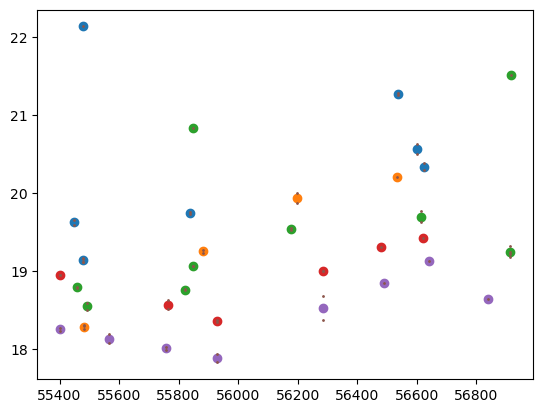

In [19]:
import matplotlib.pyplot as plt
cs = [c for c in lc.lc.columns if c.endswith('_mag')]
for c in cs:
    plt.scatter(lc.lc['mjd'], lc.lc[c], label='g')
plt.scatter(lc_raw['obsTime'], lc_raw['mag'], label='g', s=1)

In [2]:
import sys

sys.path.append('/Users/adamboesky/Research/long_transients')

# from Source_Analysis.Light_Curve import Light_Curve

# lc = Light_Curve(221.68790, 17.96113, catalogs=['panstarrs'])
# lc.lc

In [26]:
from astropy.io import ascii
import matplotlib.pyplot as plt

# g_tab = ascii.read('/Users/adamboesky/Research/long_transients/Data/test/000245_07_3/g_associated.ecsv')
g_tab = ascii.read('/Users/adamboesky/Research/long_transients/Data/test2/field_results/000245_g.ecsv')
g_tab

ra,dec,ZTF_thresh,ZTF_npix,ZTF_tnpix,ZTF_xmin,ZTF_xmax,ZTF_ymin,ZTF_ymax,ZTF_x,ZTF_y,ZTF_x2,ZTF_y2,ZTF_xy,ZTF_errx2,ZTF_erry2,ZTF_errxy,ZTF_a,ZTF_b,ZTF_theta,ZTF_cxx,ZTF_cyy,ZTF_cxy,ZTF_cflux,ZTF_flux,ZTF_cpeak,ZTF_peak,ZTF_xcpeak,ZTF_ycpeak,ZTF_xpeak,ZTF_ypeak,ZTF_sepExtractionFlag,ZTF_KronRad,ZTF_gKronMag,ZTF_gKronMagErr,ZTF_gKronCircleFlag,ZTF_gKronFlag,ZTF_gPSFMag,ZTF_gPSFMagErr,ZTF_gPSFFlags,ZTF_qfit,ZTF_cfit,ZTF_g_zero_pt_mag,ZTF_g_mag_limit,ZTF_ra,ZTF_dec,PSTARR_PanSTARR_ID,PSTARR_gKronMag,PSTARR_gKronMagErr,PSTARR_gPSFMag,PSTARR_gPSFMagErr,PSTARR_gpsfLikelihood,PSTARR_ginfoFlag2,PSTARR_rKronMag,PSTARR_rKronMagErr,PSTARR_rPSFMag,PSTARR_rPSFMagErr,PSTARR_rpsfLikelihood,PSTARR_rinfoFlag2,PSTARR_ra,PSTARR_dec,association_separation_arcsec,Catalog,Catalog_Flag,x,y,fieldid,ccdid,qid
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,int64,float64,float64,str6,str2,str1
359.8389339535459,-25.21106824275297,1.8787113428115845,5.0,2.0,2099.0,2100.0,106.0,108.0,2099.402692697109,107.24206416543642,0.2405312888040886,0.5047261685932545,0.1186882324943708,0.0162011694059947,0.0379128586452569,0.0081077492743769,0.7417643070220947,0.4416369199752807,1.204806208610535,4.703197479248047,2.2413463592529297,-2.2119486331939697,16.185882568359375,24.15283203125,4.048927307128906,13.5433349609375,2099.0,107.0,2099.0,107.0,0.0,1.046029640827709,21.61970590791708,0.2882620236888567,1.0,32.0,--,--,--,--,--,26.325,22.63,359.8389185420048,-25.211037140629937,7.774359838860694e+16,19.951099395752,0.0264999996870756,21.1229000091553,0.0296950004994869,0.0,524416.0,19.459400177002,0.0170949995517731,20.3383007049561,0.0157060008496046,0.0,524416.0,359.838949365087,-25.211099344876,0.2454095013680136,Both,0,2099.402692697109,107.24206416543642,000245,07,3
359.4611187858354,-25.20743346656621,1.8787113428115845,10.0,7.0,868.0,871.0,105.0,107.0,869.0105648393677,105.98981177340464,1.030934203270415,0.57853399364781,0.2851147753528316,0.0537287832341467,0.0250983618138476,0.0124968718432099,1.0810552835464478,0.6639184951782227,0.4500570893287658,1.1230615377426147,2.001269817352295,-1.1069408655166626,29.1749267578125,35.635986328125,4.2212982177734375,7.3359375,869.0,106.0,868.0,106.0,1.0,1.224653715238929,22.56631573532119,0.6802824382038005,1.0,32.0,--,--,--,--,--,26.325,22.63,359.46119550232385,-25.20754283618453,7.775359460685158e+16,21.5284004211426,0.0789249986410141,22.0291004180908,0.0716459974646568,7.50763007317801e-10,524288.0,20.1879005432129,0.0225060004740953,20.3745002746582,0.0163839999586344,5.996149955925949e-18,524416.0,359.461042069347,-25.2073240969479,0.9326595705216552,Both,0,869.0105648393677,105.98981177340464,000245,07,3
359.46115551722056,-25.208561947009205,1.8787113428115845,16.0,12.0,867.0,871.0,108.0,111.0,868.7999914390568,109.87674127862114,1.1270921614283678,0.9737808795919554,-0.0399968812691984,0.0211000337715284,0.017186102904624,-0.0011884376002352,1.0662548542022705,0.981821596622467,-0.240457147359848,0.8885340094566345,1.0284240245819092,0.0729909390211105,62.141746520996094,66.17236328125,6.871818542480469,10.6761474609375,869.0,110.0,869.0,110.0,1.0,0.0,23.09175117162845,1.108565407060667,1.0,160.0,--,--,--,--,--,26.325,22.63,359.4611181669561,-25.20862179389721,7.775359461205011e+16,20.7241992950439,0.0464829988777637,21.3756008148193,0.0420759990811348,1.53216995613862e-29,524416.0,19.32080078125,0.0155170001089573,19.9557991027832,0.01210100017488,2.89734998977796e-28,524416.0,359.461192867485,-25.2085021001212,0.494846272331937,Both,0,868.7999914390568,109.876

In [29]:
from astropy.coordinates import SkyCoord

coords = SkyCoord(g_tab['ra'], g_tab['dec'], unit='deg')
coord = SkyCoord(25.68613, -29.95994, unit='deg')
seps = coords.separation(coord).arcsec
g_tab[seps < 3]

ra,dec,ZTF_thresh,ZTF_npix,ZTF_tnpix,ZTF_xmin,ZTF_xmax,ZTF_ymin,ZTF_ymax,ZTF_x,ZTF_y,ZTF_x2,ZTF_y2,ZTF_xy,ZTF_errx2,ZTF_erry2,ZTF_errxy,ZTF_a,ZTF_b,ZTF_theta,ZTF_cxx,ZTF_cyy,ZTF_cxy,ZTF_cflux,ZTF_flux,ZTF_cpeak,ZTF_peak,ZTF_xcpeak,ZTF_ycpeak,ZTF_xpeak,ZTF_ypeak,ZTF_sepExtractionFlag,ZTF_KronRad,ZTF_gKronMag,ZTF_gKronMagErr,ZTF_gKronCircleFlag,ZTF_gKronFlag,ZTF_gPSFMag,ZTF_gPSFMagErr,ZTF_gPSFFlags,ZTF_qfit,ZTF_cfit,ZTF_g_zero_pt_mag,ZTF_g_mag_limit,ZTF_ra,ZTF_dec,PSTARR_PanSTARR_ID,PSTARR_gKronMag,PSTARR_gKronMagErr,PSTARR_gPSFMag,PSTARR_gPSFMagErr,PSTARR_gpsfLikelihood,PSTARR_ginfoFlag2,PSTARR_rKronMag,PSTARR_rKronMagErr,PSTARR_rPSFMag,PSTARR_rPSFMagErr,PSTARR_rpsfLikelihood,PSTARR_rinfoFlag2,PSTARR_ra,PSTARR_dec,association_separation_arcsec,Catalog,Catalog_Flag,x,y,fieldid,ccdid,qid
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,int64,float64,float64,str6,str2,str1


In [34]:
pstarr_tab = ascii.read('/Users/adamboesky/Research/long_transients/Data/test/000202_10_1/PSTARR.ecsv')
ztf_tab = ascii.read('/Users/adamboesky/Research/long_transients/Data/test/000202_10_1/ZTF_g.ecsv')
ztf_coords = SkyCoord(ztf_tab['ra'], ztf_tab['dec'], unit='deg')
pstarr_coords = SkyCoord(pstarr_tab['ra'], pstarr_tab['dec'], unit='deg')
pstarr_tab[pstarr_coords.separation(coord).arcsec < 5]

PanSTARR_ID,ra,dec,gKronMag,gKronMagErr,gApMag,gApMagErr,gPSFMag,gPSFMagErr,gpsfLikelihood,ginfoFlag2,primaryDetection,rKronMag,rKronMagErr,rApMag,rApMagErr,rPSFMag,rPSFMagErr,rpsfLikelihood,rinfoFlag2
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64


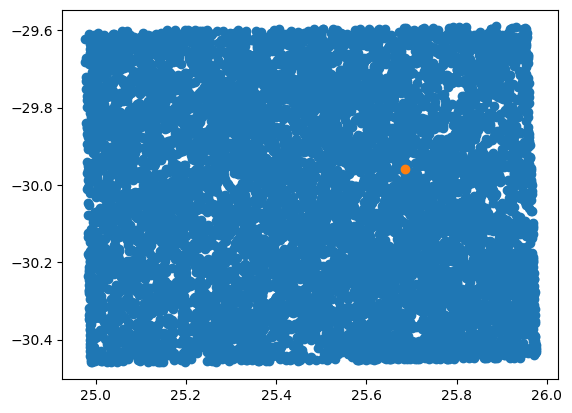

In [35]:
plt.scatter(ztf_coords.ra.deg, ztf_coords.dec.deg)
plt.scatter(coord.ra.deg, coord.dec.deg)

In [23]:
c1 = SkyCoord(359, 0, unit='deg')
c2 = SkyCoord(1, 0, unit='deg')
c1.separation(c2).deg

1.9999999999999913

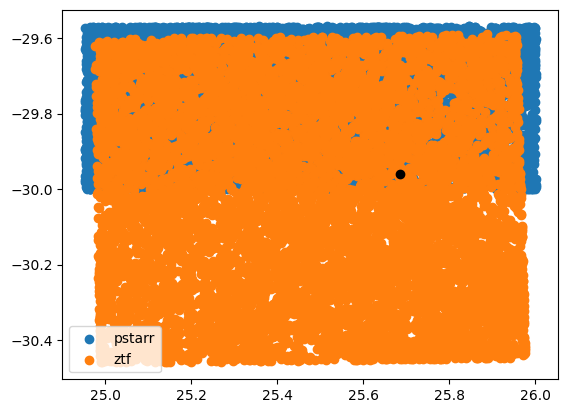

In [24]:
plt.scatter(pstarr_coords.ra.deg, pstarr_coords.dec.deg, label='pstarr')
plt.scatter(ztf_coords.ra.deg, ztf_coords.dec.deg, label='ztf')
plt.scatter(coord.ra.deg, coord.dec.deg, color='k')
plt.legend()

In [1]:
import sys

sys.path.append('/Users/adamboesky/Research/long_transients')

from Extracting.Catalogs import PSTARR_Catalog
pcat = PSTARR_Catalog(ra_range=(359.9, 360.1), dec_range=(30, 30.1))
pcat.data

/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CasJobs will use the credentials from mast_login_harvard.txt
Retrieving g_pstarr_sources_ra359p9_360p1_dec30_30p1 from MyDB!
Retrieving r_pstarr_sources_ra359p9_360p1_dec30_30p1 from MyDB!
Retrieving i_pstarr_sources_ra359p9_360p1_dec30_30p1 from MyDB!


PanSTARR_ID,ra,dec,gKronMag,gKronMagErr,gPSFMag,gPSFMagErr,gpsfLikelihood,ginfoFlag2,primaryDetection,rKronMag,rKronMagErr,rPSFMag,rPSFMagErr,rpsfLikelihood,rinfoFlag2,iKronMag,iKronMagErr,iPSFMag,iPSFMagErr,ipsfLikelihood,iinfoFlag2
float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.439900000277978e+17,0.00267331014217406,29.9976805221642,22.8645000457764,0.228146001696587,23.1359996795654,0.168227002024651,0.0154012003913522,655360.0,1,21.9986000061035,0.103188000619411,22.5261993408203,0.0882100015878677,4.63326978206169e-06,655360.0,21.4876003265381,0.0903839990496635,21.9039001464844,0.0739559978246689,6.20610007828759e-09,655360.0
1.4399000015692931e+17,0.0158564138974914,29.9987969733348,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1,22.6277008056641,0.110160999000072,22.5631008148193,0.0796680003404617,0.647269010543823,0.0,21.7569999694824,0.091719001531601,21.8388996124268,0.0613010004162788,0.00203708000481129,0.0
1.4399000030313798e+17,0.0303116572426102,29.9977760807712,21.4640007019043,0.0707420036196709,22.2970008850098,0.0758489966392517,4.7053398420086e-25,655360.0,1,20.3416004180908,0.0305630005896091,21.2693004608154,0.0321579985320568,0.0,524416.0,19.8069000244141,0.0250550005584955,20.7388000488281,0.0235869996249676,0.0,524416.0
1.4399000040289994e+17,0.0403511736227835,29.9993526599578,22.4043006896973,0.181034997105598,22.9290008544922,0.143411993980408,0.171469002962112,0.0,1,22.1546001434326,0.0950839966535568,22.5301990509033,0.0915419980883598,2.11422999996103e-07,0.0,21.6063003540039,0.0995130017399788,22.1770992279053,0.0881500020623207,2.03679000748691e-12,0.0
1.4399000052451872e+17,0.0524336182156413,29.9984073390653,19.9328002929688,0.0150809995830059,19.7136001586914,0.011222000233829,0.574011981487274,524416.0,1,18.605899810791,0.00407900009304285,18.3754005432129,0.00338799995370209,-0.450432986021042,524416.0,17.7122001647949,0.00282000005245209,17.6063995361328,0.00225099991075695,0.694742023944855,524416.0
1.4399000054419725e+17,0.0544698873105429,29.9972273005525,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1,22.2991008758545,0.129103004932404,22.6396007537842,0.106610998511314,0.00183871004264802,0.0,21.5263996124268,0.0731490030884743,21.7602005004883,0.0542999990284443,0.0124893998727202,0.0
1.4399000057338923e+17,0.05732598,29.99884409,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,22.1256999969482,0.124544002115726,22.6016006469727,0.115552000701427,0.000276951992418617,0.0
1.439900005880694e+17,0.0588922671118053,29.9991284781543,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1,22.7287998199463,0.134276002645493,22.3202991485596,0.0712649971246719,-0.0290139000862837,0.0,21.7861995697021,0.0808399990200996,21.764799118042,0.0548680014908314,0.00556709989905357,0.0
1.4399000060320978e+17,0.0604436788752278,29.9991947633358,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1,23.2639007568359,0.22010700404644,23.2539005279541,0.166062995791435,0.365884006023407,0.0,22.1159992218018,0.110239997506142,22.1249008178711,0.0707480013370514,0.129268005490303,0.0


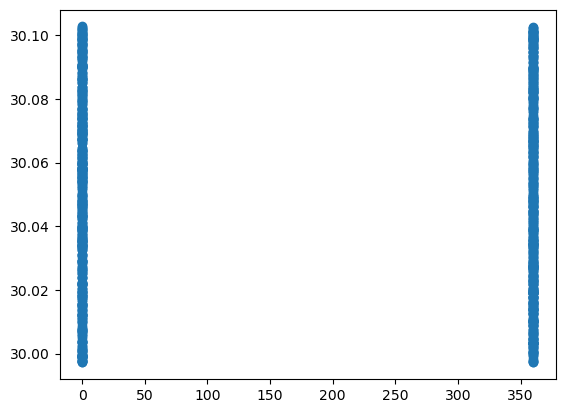

In [2]:
import matplotlib.pyplot as plt

plt.scatter(pcat.data['ra'], pcat.data['dec'])

In [1]:
import os

from Extracting.Tile import Tile
from Extracting.utils import get_data_path

tile = Tile(
    ztf_metadata={
        'fieldid': 245,
        'ccdid': 7,
        'qid': 3,
    },
    bands=['g', 'r'],
    data_dir=os.path.join(get_data_path(), 'ztf_data'),
)

ModuleNotFoundError: No module named 'Extracting'

In [11]:
tile.store_catalogs(out_parent_dir='test2')

g_pstarr_sources_ra359p19_360p17_decn26p07_n25p17 not in MyDB, submitting request to make it!
Submitted query for g_pstarr_sources_ra359p19_360p17_decn26p07_n25p17 with id=115182314
Retrieving g_pstarr_sources_ra359p19_360p17_decn26p07_n25p17 from MyDB!
r_pstarr_sources_ra359p19_360p17_decn26p07_n25p17 not in MyDB, submitting request to make it!
Submitted query for r_pstarr_sources_ra359p19_360p17_decn26p07_n25p17 with id=115182322
Retrieving r_pstarr_sources_ra359p19_360p17_decn26p07_n25p17 from MyDB!
Extracting sources...
Calculating Kron magnitudes...
Calculating PSF magnitudes...
Info for g EPSF fitting in coordinate range ((359.1948450389727, 360.1717987920435), (-26.072084042100066, -25.175305703697145)):
	Number of sources: 7726
	Number of sources with NaN nearby: 85
	Number of sources with truncated: 1
	Number of sources with NaN init flux: 0
Fitting PSF model using 170 stars...


/Users/adamboesky/Research/long_transients/Extracting/utils.py:36: RuntimeWarning: invalid value encountered in log10
  mag = -2.5 * np.log10(flux) + zero_point
/Users/adamboesky/Research/long_transients/Extracting/utils.py:45: RuntimeWarning: overflow encountered in power
  flux = 10 ** ((mag - zero_point) / -2.5)
EPSFBuilder (10 maxiters): 100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


Extracting sources...
Calculating Kron magnitudes...
Calculating PSF magnitudes...


/Users/adamboesky/Research/long_transients/Extracting/utils.py:36: RuntimeWarning: invalid value encountered in log10
  mag = -2.5 * np.log10(flux) + zero_point
/Users/adamboesky/Research/long_transients/Extracting/utils.py:45: RuntimeWarning: overflow encountered in power
  flux = 10 ** ((mag - zero_point) / -2.5)


Info for r EPSF fitting in coordinate range ((359.1987507826333, 360.1756678549498), (-26.06807481252309, -25.17129303876914)):
	Number of sources: 18005
	Number of sources with NaN nearby: 213
	Number of sources with truncated: 5
	Number of sources with NaN init flux: 0
Fitting PSF model using 196 stars...


EPSFBuilder (10 maxiters): 100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


'test2/000245_07_3'

In [1]:
import sys
sys.path.append('/Users/adamboesky/Research/long_transients')

from Source_Analysis.Sources import Sources
from Extracting.utils import load_ecsv

srcs_0 = load_ecsv('/Users/adamboesky/Research/long_transients/Data/filter_results/test/0.ecsv')
srcs_1 = load_ecsv('/Users/adamboesky/Research/long_transients/Data/filter_results/test/1.ecsv')

srcs = Sources(ras=[0.0503375370238716], decs=[-26.60024404182625], field_catalogs={'g': srcs_0, 'r': srcs_0, 'i': srcs_0})
srcs[0]._image_metadata = {}
srcs[0]._image_metadata['fieldid'] = 'test'
srcs[0].get_filtered_out_info()

CasJobs will use the credentials from mast_login_harvard.txt


/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Searching for source in the catalogs!
Searching g catalog for source...
Searching r catalog for source...
Searching i catalog for source...


{'g': 'only_big_dmag', 'r': 'no_extraction', 'i': 'no_extraction'}

In [2]:
srcs[0].get_filtered_out_info()

{'g': 'only_big_dmag', 'r': 'no_extraction', 'i': 'no_extraction'}

In [3]:
import os
import sys
import pickle
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import ztffields

from astropy.visualization import simple_norm
from astropy.io import fits
from photutils.psf import EPSFModel

sys.path.append('/Users/adamboesky/Research/long_transients')

from Extracting.utils import img_ab_mag_to_flux, load_ecsv

# Plot formatting
plt.rc('text', usetex=True)
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cmr10'  # Computer Modern Roman
mpl.rcParams['font.size'] = 12  # Adjust the font size as needed
mpl.rcParams['axes.formatter.use_mathtext'] = True

np.random.seed(22)

'ccdid'
Traceback:
Traceback (most recent call last):
  File "/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py", line 656, in plot_postage_stamps
    self.postage_stamps['ZTF'].plot_cutout(band=band, ax=axes[1], **kwargs)
  File "/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py", line 200, in plot_cutout
    if self.images[band] is None:
       ^^^^^^^^^^^
  File "/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py", line 114, in images
    self._images, self._WCSs = self.get_images()
                               ^^^^^^^^^^^^^^^^^
  File "/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py", line 252, in get_images
    'ccdid': self.image_metadata['ccdid'],
             ~~~~~~~~~~~~~~~~~~~^^^^^^^^^
KeyError: 'ccdid'

Skipping...
'ccdid'
Traceback:
Traceback (most recent call last):
  File "/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py", line 656, in plot_postage_stamps
    self.posta

/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:907: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:932: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  wise_ax.errorbar(
/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:942: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  wise_ax.errorbar(


Getting source spectrum from SDSS...
Source at (0.0503375370238716, -26.60024404182625) has no spectrum in SDSS.


/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


array([array([[<Axes: ylabel='Pan-STARRS'>, <Axes: >, <Axes: >],
              [<Axes: xlabel='g', ylabel='ZTF'>, <Axes: xlabel='r'>,
               <Axes: xlabel='i'>]], dtype=object)                  ,
       <Axes: xlabel='\\textbf{Time [mjd]}', ylabel='\\textbf{Mag}'>,
       <Axes: >, <Axes: xlabel='W1 - W2', ylabel='Number'>], dtype=object)

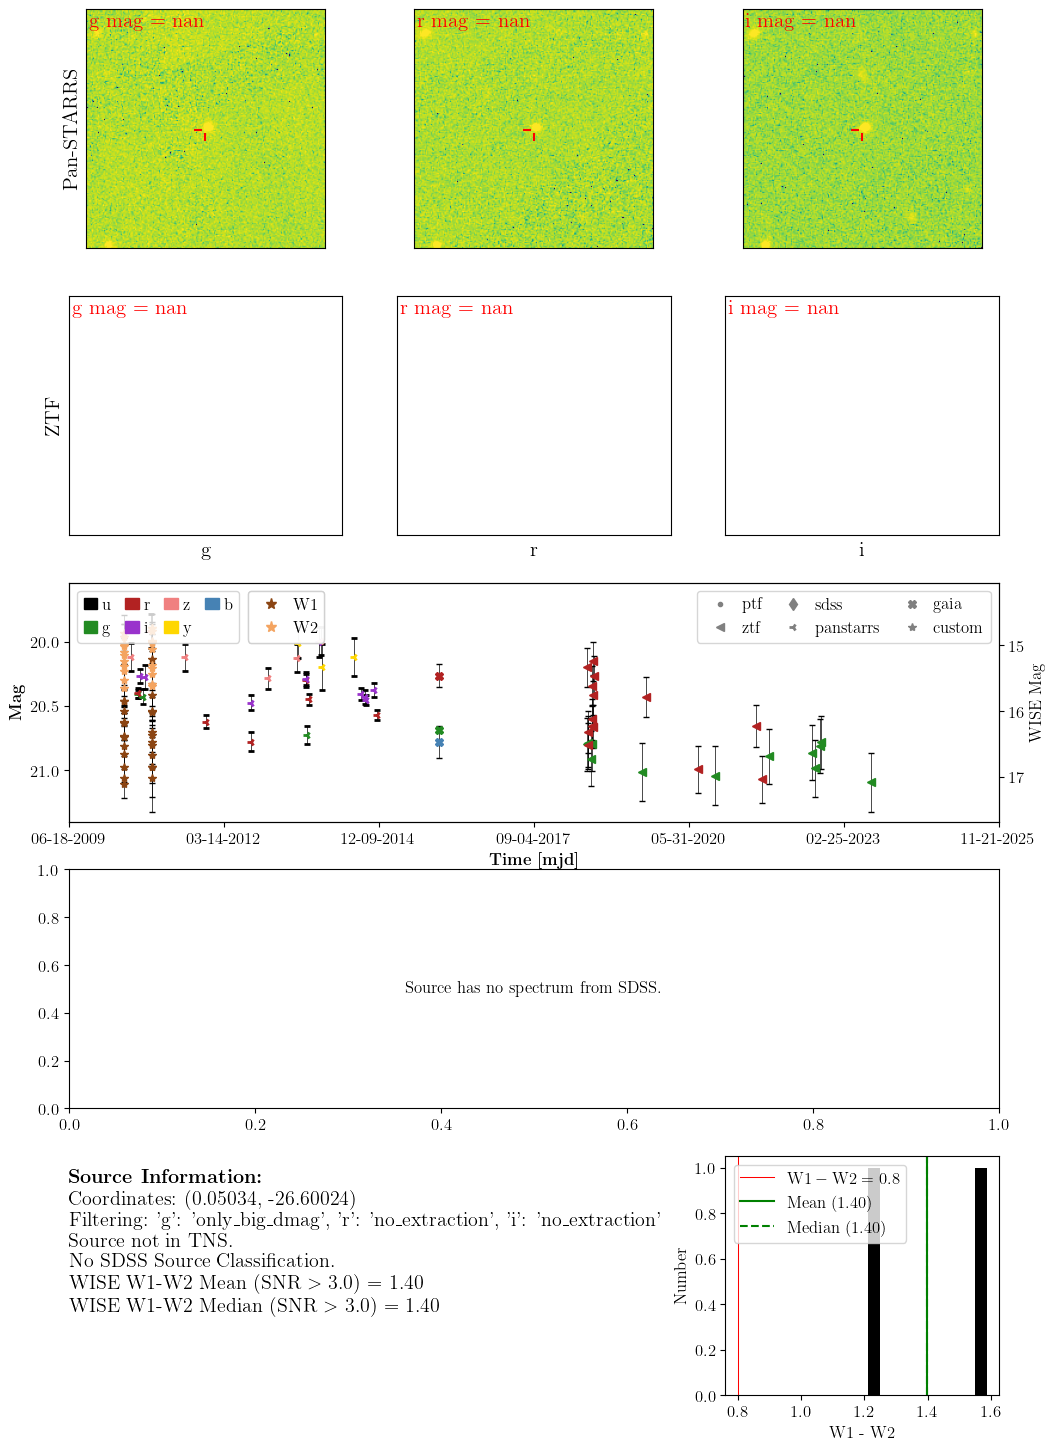

In [4]:
srcs[0].plot_everything()